In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
print(os.getcwd())


C:\Users\lenovo


In [11]:
import pandas as pd

# Load the dataset using the full file path
file_path = r'C:\Users\lenovo\Downloads\iris.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [13]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
# to display no. of samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [22]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

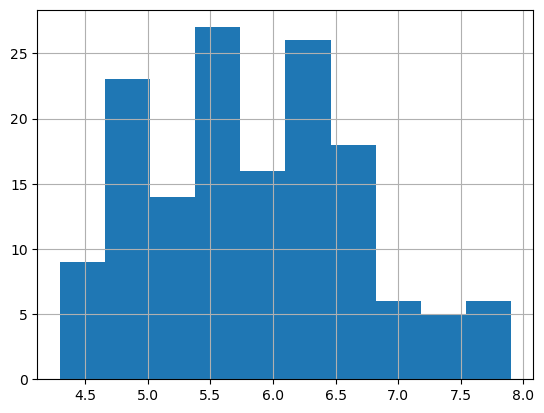

In [24]:
# histograms
df['sepal_length'].hist()

<Axes: >

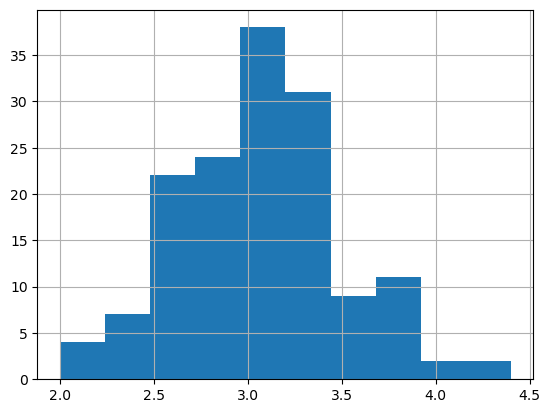

In [26]:
df['sepal_width'].hist()

<Axes: >

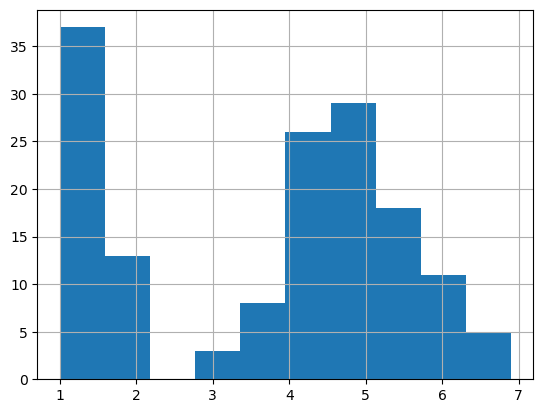

In [28]:
df['petal_length'].hist()

<Axes: >

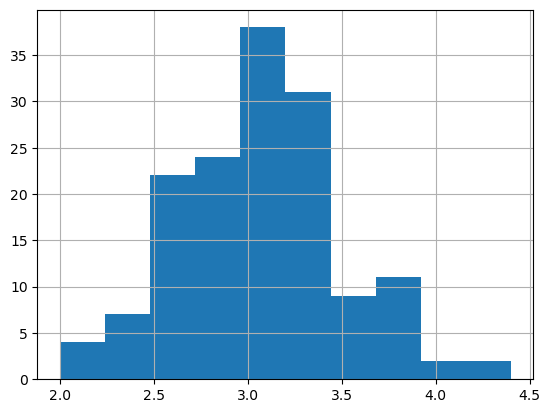

In [30]:
df['sepal_width'].hist()

In [32]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

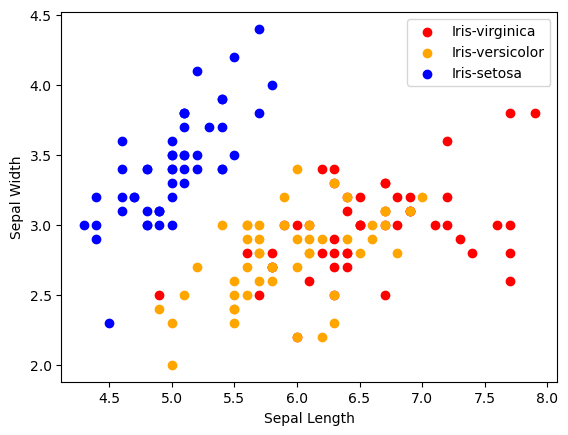

In [36]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

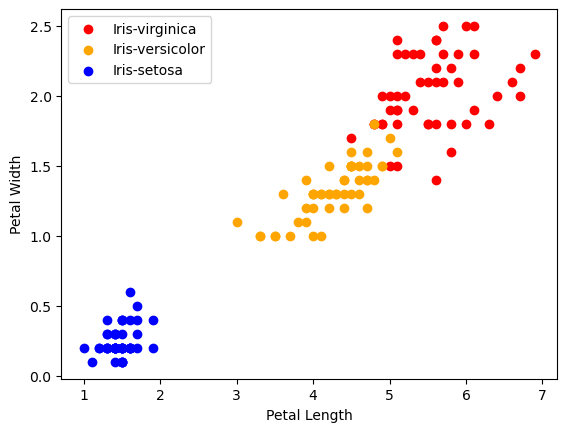

In [38]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

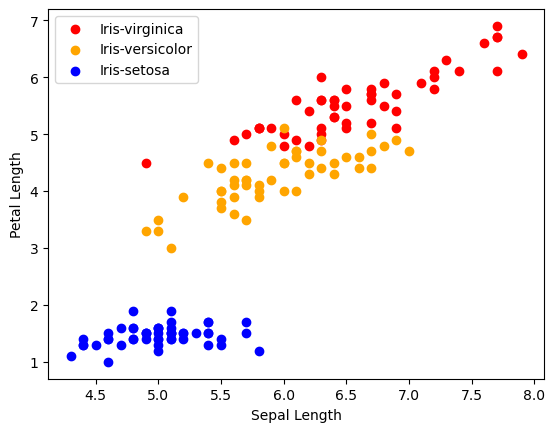

In [40]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

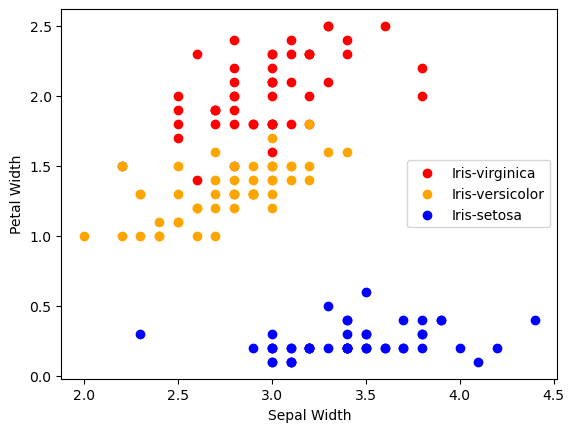

In [44]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [50]:
# CORRELATION MATRIX  

numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


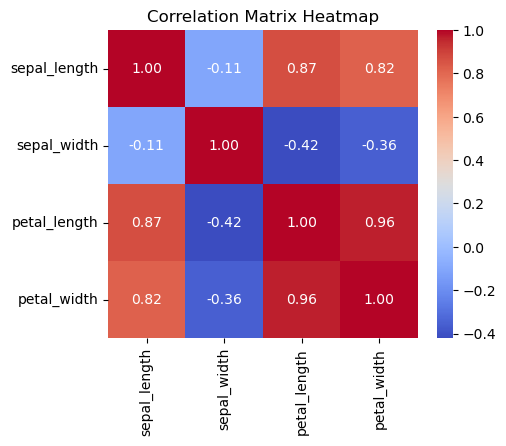

In [54]:

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [56]:
# LABEL INCODER 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
# MODEL TRAINING 
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [70]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [72]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [74]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [76]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [78]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [80]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [82]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [84]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
